In [1]:
from brian2 import *
from scipy import stats
import matplotlib.pyplot  as plt
import numpy as np

In [2]:
%matplotlib inline

In [141]:
def sim_hh(input_current, sim_time):
    E_L = 10.6*mV
    E_K = -12 * mV
    E_Na = 120 * mV
    g_L = 0.3 * msiemens
    g_K = 36* msiemens
    g_Na = 120 * msiemens

    C = 1 * ufarad


    eqs = """
    alpha_n = 0.01 * (10*mV - v) / (exp( (10*mV - v)/(10*mV)) - 1)/mV/ms    :Hz
    alpha_m = 0.1 * (25*mV - v) / (exp( (25*mV - v)/(10*mV)) - 1)/mV/ms    :Hz
    alpha_h = 0.07 * exp(-v/(20*mV))/ms                                     :Hz

    beta_n = 0.125 * exp(-v/(80*mV))/ms                                     : Hz
    beta_m = 4.0 * exp(-v/(18*mV))/ms                                       : Hz
    beta_h =  1 / (exp ((30*mV-v)/(10*mV)) + 1) /ms                         : Hz    
    
    I_e = input_current(t)                                                  :amp
    I_m = I_e + g_Na*m**3*h*(E_Na-v) + g_L*(E_L-v) + g_K*n**4*(E_K-v)       :amp
    dv/dt = I_m/C                                                           :volt
    dn/dt = alpha_n * (1-n) - beta_n*n                                      : 1
    dm/dt = alpha_m * (1-m) - beta_m*m                                      : 1
    dh/dt = alpha_h * (1-h) - beta_h*h                                      : 1
    """

    hh_neuron = NeuronGroup(1, eqs, method="exponential_euler")

    # initial values
    hh_neuron.v = 0
    hh_neuron.m = 0.05
    hh_neuron.h = 0.60
    hh_neuron.n = 0.32

    state_monitor = StateMonitor(hh_neuron, ["v", "I_e","m","n","h"], record=True)

    hh_net = Network(hh_neuron)
    hh_net.add(state_monitor)
    hh_net.run(sim_time)

    return state_monitor


In [156]:
# build a step current function
t_start = 10
t_end = 40
pulse_amp = 5 * uA # amplitude normal 7.2
timing_array = np.zeros((t_end+2,)) * amp
timing_array[t_start:t_end+1] = pulse_amp
step_current = TimedArray(timing_array, dt=1.*ms)

In [157]:
states = sim_hh(step_current, 40*ms)

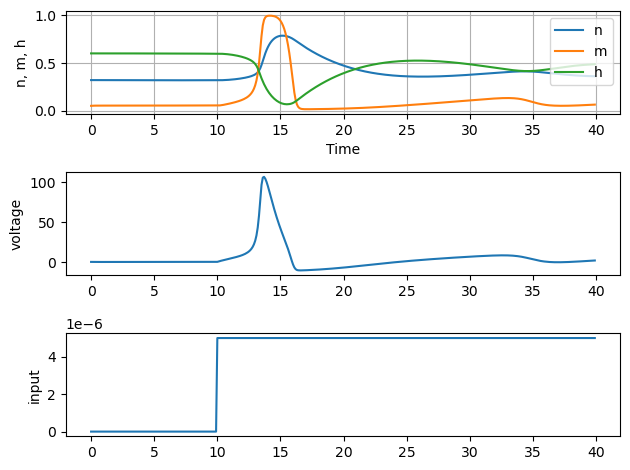

In [158]:
fig, axs = plt.subplots(3, 1)
axs[0].plot(states.t / ms, np.c_[states.n[0], states.m[0], states.h[0]], label=['n', 'm', 'h'])
axs[0].set_xlabel('Time')
axs[0].set_ylabel('n, m, h')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(states.t / ms, states.v[0]/ mV)
axs[1].set_ylabel('voltage')

axs[2].plot(states.t / ms, states.I_e[0]/ amp)
axs[2].set_ylabel('input')

fig.tight_layout()
plt.show()

## Question 3
What is the lowest current you can apply so that the neuron emits at least one spike? 
2.2 uA

What is the lowest current you can apply so that the neuron fires repetitively? 
5.1 uA

Using your plots of the simulation, characterize the difference between the repetitive and non-repetitive firing
regimes.

even if the neuron doesn't fires more than once, the current still affects the activation/inactivation gates. One can see that e.g. for 4 uA, where the gates and the voltage return to the same amount as before the spike after approximated 10 ms after applying current but then change again but not reach the threshold/pint where the spike is generated.

In [167]:
# build a ramp current function
t_start = 10
t_long = 13
t_end = t_start + t_long
start_amp = 0 * uA
pulse_amp = 4.5 * uA # amplitude
timing_array = np.zeros((t_end+2,)) * amp
ramp = np.linspace(start_amp, pulse_amp, num=t_long)
timing_array[t_start:t_end] = ramp
ramp_current = TimedArray(timing_array, dt=1.*ms)

states = sim_hh(ramp_current, 40*ms)

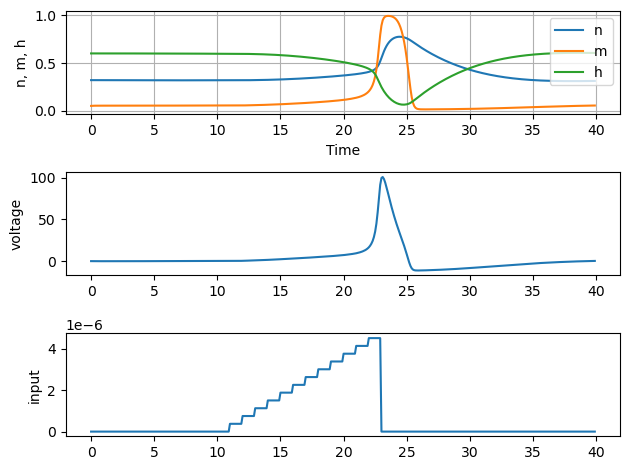

In [168]:
fig, axs = plt.subplots(3, 1)
axs[0].plot(states.t / ms, np.c_[states.n[0], states.m[0], states.h[0]], label=['n', 'm', 'h'])
axs[0].set_xlabel('Time')
axs[0].set_ylabel('n, m, h')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(states.t / ms, states.v[0]/ mV)
axs[1].set_ylabel('voltage')

axs[2].plot(states.t / ms, states.I_e[0]/ amp)
axs[2].set_ylabel('input')

fig.tight_layout()
plt.show()

## Question 4
Turn on a current that linearly increases to 12µA starting at t 0 = 10ms and lasting for t long ms until I(t 0 + t long ) = 12µA.
Find the longest t duration such that the neuron does not spike and record the Voltage at t 0 + t long.
Answer: With a duration of 59 ms and higher, no spikes are generated anymore. The voltage at 69ms is 7.2 mV.

Next, increase the current to 4.5µA and find the shortest duration t short such that the neuron does spike
in the analogous way.
Answer: With a duration of 13 and lower, a spike is still generated.

Link the difference in the spiking threshold to their dynamics.
Answer: One can clearly see when comparing a duration of 13 to 14 ms that the activation gates as well as the voltage change, but that the point where theyextremly increse/decrease it only reached if the applied current is higher.